# Exercício

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Leitura do arquivo

Realize a leitura do arquivo `notebooks_nulos_exercicio.csv`.

In [2]:
df = pd.read_csv('notebooks_nulos_exercicio.csv')

## 2. Tratamento dos valores textuais

  

Realize o tratamento dos valores textuais substituindo os nulos pela moda e, em seguida, convertendo para valores numéricos.

  

``OBS``: Se houver valor nulo na coluna "ram_gpu", é importante considerar o seguinte ao tratar os valores nulos. Se o notebook tiver valor 0 na coluna "gpu_dedicada", significa que o notebook não possui uma GPU dedicada. Nesse caso, esse valor núlo deve ser substituído por 0. Por outro lado, se tiver valor 1 na coluna "gpu_dedicada", significa que o notebook possui uma GPU dedicada e o valor nulo não pode ser substituído por 0. Além disso, é importante ressaltar que não é possível que um notebook tenha 1.5GB de RAM na GPU, pois esta coluna contém valores numéricos inteiros.

In [3]:
cols_obj = df.select_dtypes(include='O').columns
cols_obj.tolist()

['marca',
 'gpu_dedicada',
 'resolucao_tela',
 'tipo_tela',
 'tela_touch',
 'segmento']

In [4]:
df[cols_obj]

,marca,gpu_dedicada,resolucao_tela,tipo_tela,tela_touch,segmento
0,xiaomi,não,FULLHD,OLED,não,premium
1,dell,sim,FULLHD,OLED,não,jogos_premium
2,razer,sim,QUADHD,AMOLED,não,jogos_premium
3,xiaomi,não,4K,AMOLED,não,premium
4,asus,não,HD,VA,não,NaN
...,...,...,...,...,...,...
9995,positivo,não,HD,IPS,não,NaN
9996,huawei,não,QUADHD,AMOLED,não,NaN
9997,dell,não,HD,IPS,não,intermediario
9998,hp,sim,FULLHD,TN,não,jogos_entrada


In [5]:
df[cols_obj].isna().sum() * 100 / len(df)

marca              0.00
gpu_dedicada       0.00
resolucao_tela     0.00
tipo_tela         11.21
tela_touch         0.00
segmento           9.46
dtype: float64

In [6]:
for i in df.columns:
    if (df.isna().sum()[i] > 0) and (i in cols_obj):
        df.loc[df[i].isna(), i] = df[i].mode()[0]

In [7]:
df[cols_obj].isna().sum()

marca             0
gpu_dedicada      0
resolucao_tela    0
tipo_tela         0
tela_touch        0
segmento          0
dtype: int64

In [8]:
df['ram_gpu'].isna().sum()

1561

In [9]:
df.loc[(df['gpu_dedicada'] == 'não') & (df['ram_gpu'].isna()), 'ram_gpu'] = 0
df.loc[(df['gpu_dedicada'] == 'sim') & (df['ram_gpu'].isna()), 'ram_gpu'] = df.loc[df['gpu_dedicada'] == 'sim']['ram_gpu'].median()

In [10]:
df['ram_gpu'].isna().sum()

0

In [11]:
le = LabelEncoder()
for i in cols_obj:
    df[i] = le.fit_transform(df[i])

In [12]:
df[cols_obj]

,marca,gpu_dedicada,resolucao_tela,tipo_tela,tela_touch,segmento
0,10,0,1,2,0,6
1,3,1,1,2,0,5
2,8,1,3,0,0,5
3,10,0,0,0,0,6
4,2,0,2,4,0,6
...,...,...,...,...,...,...
9995,7,0,2,1,0,6
9996,5,0,3,0,0,6
9997,3,0,2,1,0,2
9998,4,1,1,3,0,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              10000 non-null  int32  
 1   ano                9722 non-null   float64
 2   qtd_nucleos        10000 non-null  int64  
 3   qtd_threads        10000 non-null  int64  
 4   ram                10000 non-null  int64  
 5   gpu_dedicada       10000 non-null  int32  
 6   ram_gpu            10000 non-null  float64
 7   entradas_usb       6071 non-null   float64
 8   duracao_bateria    7568 non-null   float64
 9   resolucao_tela     10000 non-null  int32  
 10  tipo_tela          10000 non-null  int32  
 11  tela_touch         10000 non-null  int32  
 12  armazenamento_hdd  8876 non-null   float64
 13  armazenamento_ssd  9930 non-null   float64
 14  segmento           10000 non-null  int32  
 15  valor              10000 non-null  int64  
dtypes: float64(6), int32(6)

## 3. Tratamento dos valores numéricos - Método da Média

  

### 3.1. Conversão dos valores numéricos nulos

  

Converta todos os valores numéricos nulos para a média.

In [14]:
df.isna().sum() * 100 / len(df)

marca                 0.00
ano                   2.78
qtd_nucleos           0.00
qtd_threads           0.00
ram                   0.00
gpu_dedicada          0.00
ram_gpu               0.00
entradas_usb         39.29
duracao_bateria      24.32
resolucao_tela        0.00
tipo_tela             0.00
tela_touch            0.00
armazenamento_hdd    11.24
armazenamento_ssd     0.70
segmento              0.00
valor                 0.00
dtype: float64

In [15]:
for i in df.columns:
    if (df.isna().sum()[i] > 0) and (i not in cols_obj):
        df.loc[df[i].isna(), i] = df[i].mean()

In [16]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

### 3.2. Separação de X e y

  

Separe X e y.

In [17]:
X = df.drop('valor', axis = 1)
y = df[['valor']]

### 3.3. Normalização de X e y

  

Normalize X e y.

In [18]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

### 3.4. Separação de X e y - Treinamento, Validação e Teste

  

Separe X e y de treinamento (70%), validação (15%) e teste (15%) com o random state = 42.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

### 3.5. Treinamento de um modelo de rede neural

  

Treine um modelo de rede neural.


In [20]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15)

In [21]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping])

Epoch 1/100
219/219 [==============================] - 7s 7ms/step - loss: 0.0223 - val_loss: 0.0162
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0147 - val_loss: 0.0137
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0127 - val_loss: 0.0131
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0119 - val_loss: 0.0132
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0141
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0115 - val_loss: 0.0127
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0110 - val_loss: 0.0121
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0108 - val_loss: 0.0141
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0107 - val_lo

### 3.6. Avaliação do modelo

  

Exiba as métricas do modelo (não esqueça de desnormalizar y_teste e y_predito).

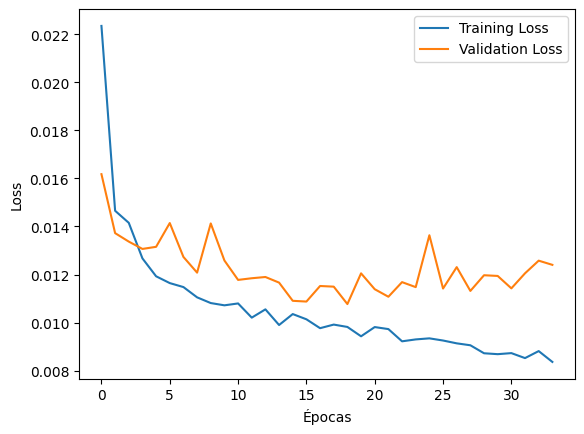

In [22]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test)

y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

47/47 [==============================] - 1s 2ms/step


In [24]:
media_mse = mean_squared_error(y_pred_orig, y_test_orig)
print('Erro médio quadrático:', media_mse)

media_mae = mean_absolute_error(y_pred_orig, y_test_orig)
print('Erro médio absoluto:', media_mae)

media_rmse = mean_squared_error(y_pred_orig, y_test_orig, squared = False)
print('Raíz do erro médio quadrático:', media_rmse)

media_r2 = r2_score(y_pred_orig, y_test_orig)
print('R²:', media_r2)

Erro médio quadrático: 7257666.605910627
Erro médio absoluto: 2026.3793618164063
Raíz do erro médio quadrático: 2694.005680378315
R²: 0.7493624715707807


## 4. Tratamento dos valores numéricos - Método da Mediana

In [25]:
df = pd.read_csv('notebooks_nulos_exercicio.csv')

In [26]:
df.loc[(df['gpu_dedicada'] == 'não') & (df['ram_gpu'].isna()), 'ram_gpu'] = 0
df.loc[(df['gpu_dedicada'] == 'sim') & (df['ram_gpu'].isna()), 'ram_gpu'] = df.loc[df['gpu_dedicada'] == 'sim']['ram_gpu'].median()

In [27]:
cols_obj = df.select_dtypes(include='O').columns

for i in df.columns:
    if (df.isna().sum()[i] > 0) and (i in cols_obj):
        df.loc[df[i].isna(), i] = df[i].mode()[0]

le = LabelEncoder()
for i in cols_obj:
    df[i] = le.fit_transform(df[i])

### 4.1. Conversão dos valores numéricos nulos

  

Converta todos os valores numéricos nulos para a mediana.

In [28]:
df.isna().sum() * 100 / len(df)

marca                 0.00
ano                   2.78
qtd_nucleos           0.00
qtd_threads           0.00
ram                   0.00
gpu_dedicada          0.00
ram_gpu               0.00
entradas_usb         39.29
duracao_bateria      24.32
resolucao_tela        0.00
tipo_tela             0.00
tela_touch            0.00
armazenamento_hdd    11.24
armazenamento_ssd     0.70
segmento              0.00
valor                 0.00
dtype: float64

In [29]:
for i in df.columns:
    if (df.isna().sum()[i] > 0) and (i not in df.select_dtypes(include='O').columns):
        df.loc[df[i].isna(), i] = df[i].median()

In [30]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

### 4.2. Separação de X e y

  

Separe X e y.

In [31]:
X = df.drop('valor', axis = 1)
y = df[['valor']]

### 4.3. Normalização de X e y

  

Normalize X e y.


In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

### 4.4. Separação de X e y - Treinamento, Validação e Teste

  

Separe X e y de treinamento (70%), validação (15%) e teste (15%) com o random state = 42.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

### 4.5. Treinamento de um modelo de rede neural

  

Treine um modelo de rede neural.

In [34]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15)

In [35]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping])

Epoch 1/100
219/219 [==============================] - 4s 4ms/step - loss: 0.0237 - val_loss: 0.0153
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0149 - val_loss: 0.0139
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0130 - val_loss: 0.0160
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0125 - val_loss: 0.0136
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0123 - val_loss: 0.0134
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0118 - val_loss: 0.0127
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0125
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0134
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0109 - val_lo

### 4.6. Avaliação do modelo

  

Exiba as métricas do modelo (não esqueça de desnormalizar y_teste e y_predito).


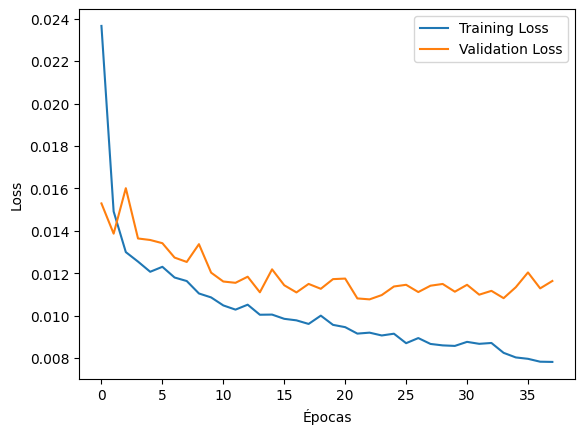

In [36]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
y_pred = model.predict(X_test)

y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

47/47 [==============================] - 0s 2ms/step


In [38]:
mediana_mse = mean_squared_error(y_pred_orig, y_test_orig)
print('Erro médio quadrático:', mediana_mse)

mediana_mae = mean_absolute_error(y_pred_orig, y_test_orig)
print('Erro médio absoluto:', mediana_mae)

mediana_rmse = mean_squared_error(y_pred_orig, y_test_orig, squared = False)
print('Raíz do erro médio quadrático:', mediana_rmse)

mediana_r2 = r2_score(y_pred_orig, y_test_orig)
print('R²:', mediana_r2)

Erro médio quadrático: 7365812.263387956
Erro médio absoluto: 2038.811123046875
Raíz do erro médio quadrático: 2714.0029962009908
R²: 0.7801072013561732


## 5. Tratamento dos valores numéricos - Método da Moda

In [39]:
df = pd.read_csv('notebooks_nulos_exercicio.csv')

In [40]:
df.loc[(df['gpu_dedicada'] == 'não') & (df['ram_gpu'].isna()), 'ram_gpu'] = 0
df.loc[(df['gpu_dedicada'] == 'sim') & (df['ram_gpu'].isna()), 'ram_gpu'] = df.loc[df['gpu_dedicada'] == 'sim']['ram_gpu'].median()

### 5.1. Conversão dos valores numéricos nulos

  

Converta todos os valores numéricos nulos para a moda.


In [41]:
for i in df.columns:
    df.loc[df[i].isna(), i] = df[i].mode()[0]

cols_obj = df.select_dtypes(include='O').columns

le = LabelEncoder()
for i in cols_obj:
    df[i] = le.fit_transform(df[i])

In [42]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

### 5.2. Separação de X e y

  

Separe X e y.

In [43]:
X = df.drop('valor', axis = 1)
y = df[['valor']]

### 5.3. Normalização de X e y

  

Normalize X e y.

In [44]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

### 5.4. Separação de X e y - Treinamento, Validação e Teste

  

Separe X e y de treinamento (70%), validação (15%) e teste (15%) com o random state = 42.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

### 5.5. Treinamento de um modelo de rede neural

  

Treine um modelo de rede neural.

In [46]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15)

In [47]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping])

Epoch 1/100
219/219 [==============================] - 4s 7ms/step - loss: 0.0260 - val_loss: 0.0153
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0133 - val_loss: 0.0146
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0175
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0125 - val_loss: 0.0140
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0120 - val_loss: 0.0127
Epoch 8/100
219/219 [==============================] - 1s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 10/100
219/219 [==============================] - 2s 7ms/step - loss: 0.0112 - val_lo

### 5.6. Avaliação do modelo

  

Exiba as métricas do modelo (não esqueça de desnormalizar y_teste e y_predito).

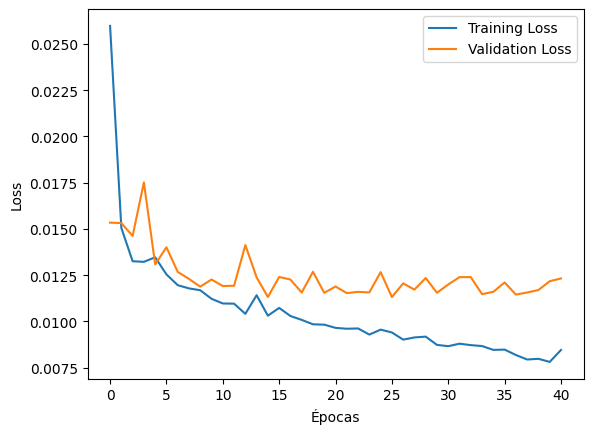

In [48]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
y_pred = model.predict(X_test)

y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

47/47 [==============================] - 0s 3ms/step


In [50]:
moda_mse = mean_squared_error(y_pred_orig, y_test_orig)
print('Erro médio quadrático:', moda_mse)

moda_mae = mean_absolute_error(y_pred_orig, y_test_orig)
print('Erro médio absoluto:', moda_mae)

moda_rmse = mean_squared_error(y_pred_orig, y_test_orig, squared = False)
print('Raíz do erro médio quadrático:', moda_rmse)

moda_r2 = r2_score(y_pred_orig, y_test_orig)
print('R²:', moda_r2)

Erro médio quadrático: 7828746.132330607
Erro médio absoluto: 2103.7394816080728
Raíz do erro médio quadrático: 2797.989659082143
R²: 0.7427026789163026


## 6. Tratamento dos valores numéricos - Método da Média, Mediana ou Moda

In [51]:
df = pd.read_csv('notebooks_nulos_exercicio.csv')

In [52]:
df.loc[(df['gpu_dedicada'] == 'não') & (df['ram_gpu'].isna()), 'ram_gpu'] = 0
df.loc[(df['gpu_dedicada'] == 'sim') & (df['ram_gpu'].isna()), 'ram_gpu'] = df.loc[df['gpu_dedicada'] == 'sim']['ram_gpu'].median()

In [53]:
cols_obj = df.select_dtypes(include='O').columns

for i in df.columns:
    if (df.isna().sum()[i] > 0) and (i in cols_obj):
        df.loc[df[i].isna(), i] = df[i].mode()[0]

le = LabelEncoder()
for i in cols_obj:
    df[i] = le.fit_transform(df[i])

### 6.1. Conversão dos valores numéricos nulos

  

Converta todos os valores numéricos nulos para a média, mediana ou moda, de acordo com o valor mais adequado encontrado de acordo com o desvio padrão e a comparação entre a média e mediana.

In [54]:
df.isna().sum() * 100 / len(df)

marca                 0.00
ano                   2.78
qtd_nucleos           0.00
qtd_threads           0.00
ram                   0.00
gpu_dedicada          0.00
ram_gpu               0.00
entradas_usb         39.29
duracao_bateria      24.32
resolucao_tela        0.00
tipo_tela             0.00
tela_touch            0.00
armazenamento_hdd    11.24
armazenamento_ssd     0.70
segmento              0.00
valor                 0.00
dtype: float64

In [55]:
for i in df.columns:
    if (df.isna().sum()[i] > 0) and (i not in df.select_dtypes(include='O').columns):
        print(df[[i]].describe().loc[['std','mean','50%']].T)

          std         mean     50%
ano  4.006412  2016.425838  2016.0
                   std      mean  50%
entradas_usb  0.885264  2.604843  3.0
                        std       mean    50%
duracao_bateria  191.277946  347.25436  419.0
                          std        mean  50%
armazenamento_hdd  572.425031  333.737044  0.0
                          std       mean    50%
armazenamento_ssd  649.093236  623.06143  250.0


In [56]:
df.loc[df['ano'].isna(), 'ano'] = df['ano'].mean()

df.loc[df['entradas_usb'].isna(), 'entradas_usb'] = df['entradas_usb'].mean()

In [57]:
df.loc[df['duracao_bateria'].isna(), 'duracao_bateria'] = df['duracao_bateria'].median()

df.loc[df['armazenamento_hdd'].isna(), 'armazenamento_hdd'] = df['armazenamento_hdd'].median()

df.loc[df['armazenamento_ssd'].isna(), 'armazenamento_ssd'] = df['armazenamento_ssd'].median()

In [58]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

### 6.2. Separação de X e y

  

Separe X e y.

In [59]:
X = df.drop('valor', axis = 1)
y = df[['valor']]

### 6.3. Normalização de X e y

  

Normalize X e y.


In [60]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

### 6.4. Separação de X e y - Treinamento, Validação e Teste

  

Separe X e y de treinamento (70%), validação (15%) e teste (15%) com o random state = 42.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

### 6.5. Treinamento de um modelo de rede neural

  

Treine um modelo de rede neural.

In [62]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15)

In [63]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping])

Epoch 1/100
219/219 [==============================] - 4s 5ms/step - loss: 0.0250 - val_loss: 0.0149
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0140 - val_loss: 0.0180
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0138 - val_loss: 0.0128
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0126 - val_loss: 0.0170
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0123 - val_loss: 0.0128
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0120
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0124
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0151
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0109 - val_lo

### 6.6. Avaliação do modelo

  

Exiba as métricas do modelo (não esqueça de desnormalizar y_teste e y_predito).

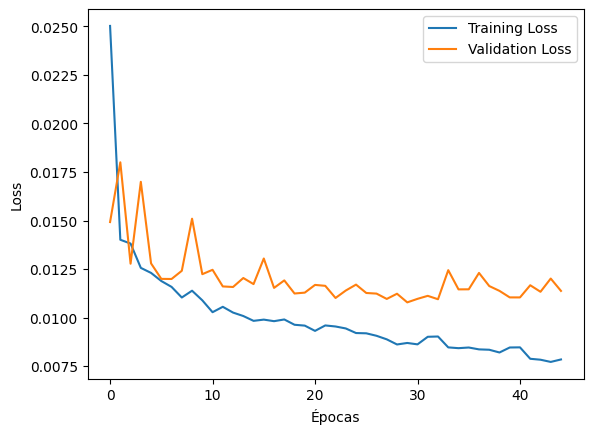

In [64]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
y_pred = model.predict(X_test)

y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

47/47 [==============================] - 0s 2ms/step


In [66]:
mmm_mse = mean_squared_error(y_pred_orig, y_test_orig)
print('Erro médio quadrático:', mmm_mse)

mmm_mae = mean_absolute_error(y_pred_orig, y_test_orig)
print('Erro médio absoluto:', mmm_mae)

mmm_rmse = mean_squared_error(y_pred_orig, y_test_orig, squared = False)
print('Raíz do erro médio quadrático:', mmm_rmse)

mmm_r2 = r2_score(y_pred_orig, y_test_orig)
print('R²:', mmm_r2)

Erro médio quadrático: 7301526.895702996
Erro médio absoluto: 2059.566857421875
Raíz do erro médio quadrático: 2702.133767174193
R²: 0.7089085728424502


# 7 - Qual dos 3 modelos performou melhor?

In [67]:
print('Modelo média:')

print('\tErro médio quadrático:', media_mse)
print('\tErro médio absoluto:', media_mae)
print('\tRaíz do erro médio quadrático:', media_rmse)
print('\tR²:', media_r2)

print('\n----------------------------------------------------------------\n')


print('Modelo mediana:')

print('\tErro médio quadrático:', mediana_mse)
print('\tErro médio absoluto:', mediana_mae)
print('\tRaíz do erro médio quadrático:', mediana_rmse)
print('\tR²:', mediana_r2)

print('\n----------------------------------------------------------------\n')


print('Modelo moda:')

print('\tErro médio quadrático:', moda_mse)
print('\tErro médio absoluto:', moda_mae)
print('\tRaíz do erro médio quadrático:', moda_rmse)
print('\tR²:', moda_r2)
print('\n----------------------------------------------------------------\n')


print('Modelo média, mediana, moda:')

print('\tErro médio quadrático:', mmm_mse)
print('\tErro médio absoluto:', mmm_mae)
print('\tRaíz do erro médio quadrático:', mmm_rmse)
print('\tR²:', mmm_r2)

Modelo média:
	Erro médio quadrático: 7257666.605910627
	Erro médio absoluto: 2026.3793618164063
	Raíz do erro médio quadrático: 2694.005680378315
	R²: 0.7493624715707807

----------------------------------------------------------------

Modelo mediana:
	Erro médio quadrático: 7365812.263387956
	Erro médio absoluto: 2038.811123046875
	Raíz do erro médio quadrático: 2714.0029962009908
	R²: 0.7801072013561732

----------------------------------------------------------------

Modelo moda:
	Erro médio quadrático: 7828746.132330607
	Erro médio absoluto: 2103.7394816080728
	Raíz do erro médio quadrático: 2797.989659082143
	R²: 0.7427026789163026

----------------------------------------------------------------

Modelo média, mediana, moda:
	Erro médio quadrático: 7301526.895702996
	Erro médio absoluto: 2059.566857421875
	Raíz do erro médio quadrático: 2702.133767174193
	R²: 0.7089085728424502
